# Combination model comparison

Nicholas Hamilton
nicholas.hamilton@nrel.gov

2020-09-18

In [1]:
### system-level libs
import os, sys
import warnings
warnings.filterwarnings('ignore')

### analysis libs
import numpy as np
import pandas as pd

### plotting libs
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import seaborn as sns
import floris.tools as ft

### some convenient magics
%load_ext autoreload
%autoreload 2

## initialize Floris
Same setup as in the `example_input.json`, but with 5 turbines aligned axially.

In [2]:
fi = ft.floris_interface.FlorisInterface('combination_test_input.json')

## Show the flowfield (xy-plane) for each combination model
The SOSFS (top) and FLS (middle) models are noticeably different, the MAX model (bottom) looks similar to the SOSFS 

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


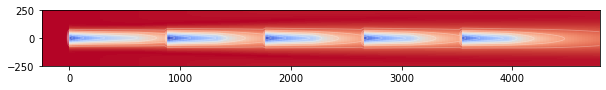

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


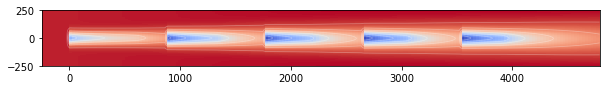

floris.tools.floris_interface.FlorisInterface INFO Default to hub height = 90.0 for horizontal plane.


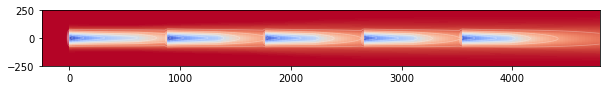

In [3]:
# set combination model to SOSFS (sum-of-squares freestream, default)
fi.floris.farm.wake.combination_model = 'sosfs'
fig,ax = plt.subplots(figsize=(10,3))
fi.show_flow_field(ax=ax)
fig.tight_layout()

# set combination model to FLS (freestream-linear combination)
fi.floris.farm.wake.combination_model = 'fls'
fig,ax = plt.subplots(figsize=(10,3))
fi.show_flow_field(ax=ax)
fig.tight_layout()

# set combination model to MAX (maximum deficit combination)
fi.floris.farm.wake.combination_model = 'max'
fig,ax = plt.subplots(figsize=(10,3))
fi.show_flow_field(ax=ax)
fig.tight_layout()

## Get velocity data
Points are aligned with the hubs in y and z

In [4]:
xpoints = np.arange(-100.0,5000)
ypoints = np.zeros(xpoints.shape)
zpoints = fi.floris.farm.turbines[0].hub_height*np.ones(xpoints.shape)

# set combination model to SOSFS (sum-of-squares freestream, default)
fi.floris.farm.wake.combination_model = 'sosfs'
SOSFSvdata = fi.get_set_of_points(xpoints, ypoints, zpoints)
SOSFSvdata = SOSFSvdata.iloc[5:]

# set combination model to FLS (freestream-linear combination)
fi.floris.farm.wake.combination_model = 'fls'
FLSvdata = fi.get_set_of_points(xpoints, ypoints, zpoints)
FLSvdata = FLSvdata.iloc[5:]

# set combination model to MAX (maximum deficit combination)
fi.floris.farm.wake.combination_model = 'max'
MASvdata = fi.get_set_of_points(xpoints, ypoints, zpoints)
MASvdata = MASvdata.iloc[5:]


## Plot Velocity
This is the combined wakes of all 5 wind turbines. Note that the MAX and SOSFS models appear very similar.

Text(0, 0.5, 'U [m/s]')

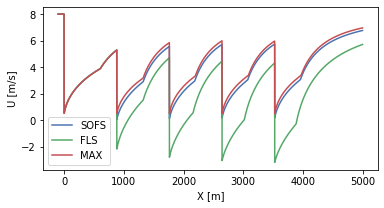

In [5]:
fig,ax = plt.subplots(figsize=(6,3))

plt.plot(SOSFSvdata.x, SOSFSvdata.u, label='SOFS')
plt.plot(FLSvdata.x, FLSvdata.u, label='FLS')
plt.plot(MASvdata.x, MASvdata.u, label='MAX')

plt.legend()
plt.xlabel('X [m]')
plt.ylabel('U [m/s]')

## Plot Velocity Deficit
The MAX combination model iteratively takes the maximum velocity deficit as the combined flow field. Because the velocity deficit of Turbine 1 has recovered to around 40% by the time the flow is at Turbine 2, the wake from turbine 2 is taken directly. In contrast, both the SOSFS and the FLS models combine the velocity deficits of the two (or more) wakes.

The SOSFS essentially combines the kinetic energy of the local flow with each newly-added wake. The FLS model is closer to a combination of momentum. Note that the FLS model can produce normalized velcoity deficits greater than 1, corresponding to _negative_ velocities. This is why we don't typically use the FLS model.

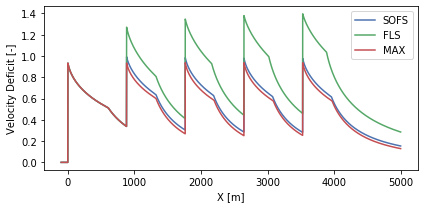

In [6]:
fig,ax = plt.subplots(figsize=(6,3))

Uinf = fi.floris.farm.wind_speed[0]

plt.plot(SOSFSvdata.x, 1 - SOSFSvdata.u/Uinf, label='SOFS')
plt.plot(FLSvdata.x, 1 - FLSvdata.u/Uinf, label='FLS')
plt.plot(MASvdata.x, 1 - MASvdata.u/Uinf, label='MAX')

plt.legend()
plt.xlabel('X [m]')
plt.ylabel('Velocity Deficit [-]')

plt.tight_layout()